In [271]:
# Import all the needed modules
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from scipy.optimize import minimize
import tqdm
from time import time
# Setup pyplot's figure params
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5
rcParams["figure.dpi"] = 100
img_dir = "./images/"
%matplotlib inline
# define accuracy
eps = 0.001

The use of first- and second-order methods (Gradient Descent, Conjugate Gradient
Descent, Newton’s method and Levenberg-Marquardt algorithm) in the tasks of
unconstrained nonlinear optimization
Problems and methods
Generate random numbers α ∈ (0,1) and β ∈ (0,1). Furthermore, generate the
noisy data {x k , y k }, where k = 0, ... ,100, according to the following rule:
y k = αx k + β + δ k ,
x k =
k
,
100
where δ k ~N(0,1) are values of a random variable with standard normal
distribution. Approximate the data by the following linear and rational functions:
1. F(x, a, b) = ax + b (linear approximant),
2. F(x, a, b) =
a
1+bx
(rational approximant),
by means of least squares through the numerical minimization (with precision ε =
0.001) of the following function:
100
D(a, b) = ∑(F (x k , a, b) − y k ) 2 .
k=0

To solve the minimization problem, use the methods of Gradient Descent, Conjugate
Gradient Descent, Newton’s method and Levenberg-Marquardt algorithm. If
necessary, set the initial approximations and other parameters of the methods.
Visualize the data and the approximants obtained separately for each type of
approximant. Analyze the results obtained (in terms of number of iterations,
precision, number of function evaluations, etc.) and compare them with those from
Task 2 for the same dataset.

In [272]:
# linear function for regression
def linear(x, a, b):
    return a*x+b

def linear_gradient(x, a, b):
    return [x, [1]*len(x)]

# rational function for regression
def rational(x, a, b):
    return a/(1+b*x)

# function for computing mean square error
def mse_loss(x, y, x_args, func):
    a, b = x
    return np.mean((func(x_args, a, b)-y)**2)

def mse_gradient(x, y, x_args, func, func_grad):
    a, b = x
    
    f = func(x_args, a, b)-y
    # print(f)
    f_g = func_grad(x_args, a, b)
    mse_grad = np.multiply(f, f_g)
    # mse_grad = f_g
    mse_grad = np.mean(mse_grad)
    
    # mse_grad = 2*np.mean(np.sum((func(x_args, a, b)-y)))
    
    # mse_grad = np.mean(func_grad(x_args, a, b)) * mse_grad
    return mse_grad

# function for generating random noised linear data
def generate_data(a, b, k=100):
    y_k = [ a*i/k+b+np.random.normal(0, 0.1) for i in range(k) ]
    return np.array(y_k)    

In [273]:
def gradient_decient(init_pred, y, func, func_grad, gamma=0.001, max_iter=1000):
    iter_num = 0
    x_args = np.linspace(0, 1, 100)
    pred = None
    
    prev_pred = init_pred
    while iter_num < max_iter:
        
        grad = mse_gradient(prev_pred, y, x_args, func, func_grad)
        pred = prev_pred - gamma*grad
        
        step_diff = abs(np.min(pred - prev_pred))
        iter_num += 1
    
        # if step_diff < eps:
        #     break
            
        prev_pred = pred
            
    return pred, iter_num

In [274]:
alpha = np.random.uniform()
beta = np.random.uniform()

y_noisy = generate_data(alpha, beta)

init_pred = np.random.uniform(0, 1, (1, 2))[0]

gradient_decient(init_pred, y_noisy, linear, linear_gradient, gamma=0.001, max_iter=100)

[array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.7474

(array([0.25178136, 0.92564747]), 100)

In [277]:
alpha

0.9373475668034654

In [276]:
beta

0.025338245682328675

In [261]:
init_pred

array([0.40697497, 0.01610389])

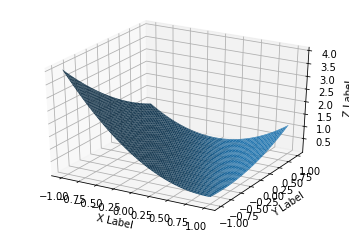

In [270]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x_args = np.linspace(0, 1, 100)
y_noisy = generate_data(alpha, beta, k=100)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
zs = []
# zs = np.array(mse_loss((np.ravel(X), np.ravel(Y)), y_noisy, x_args, linear))
for i in x:
    for j in y:
        zs.append(mse_loss((i, j), y_noisy, x_args, linear))

zs = np.array(zs)
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [267]:
Y

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01010101, 0.01010101, 0.01010101, ..., 0.01010101, 0.01010101,
        0.01010101],
       [0.02020202, 0.02020202, 0.02020202, ..., 0.02020202, 0.02020202,
        0.02020202],
       ...,
       [0.97979798, 0.97979798, 0.97979798, ..., 0.97979798, 0.97979798,
        0.97979798],
       [0.98989899, 0.98989899, 0.98989899, ..., 0.98989899, 0.98989899,
        0.98989899],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])